## Load dataset into Dataloader

In [1]:
import os
import numpy as np

import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets


data_dir = '/media/shan/Data/places365/places3_standard'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

train_data_ori = datasets.ImageFolder(train_dir, transforms.Compose([
    transforms.ToTensor(),
]))

val_data_ori = datasets.ImageFolder(val_dir, transforms.Compose([
    transforms.ToTensor(),
]))

test_data_ori = datasets.ImageFolder(test_dir, transforms.Compose([
    transforms.ToTensor(),
]))

train_ori_loader = torch.utils.data.DataLoader(
        train_data_ori,
        batch_size=1, shuffle=False,
        num_workers=6, pin_memory=True)

val_ori_loader = torch.utils.data.DataLoader(
        val_data_ori,
        batch_size=1, shuffle=False,
        num_workers=6, pin_memory=True)

test_ori_loader = torch.utils.data.DataLoader(
        test_data_ori,
        batch_size=1, shuffle=False,
        num_workers=6, pin_memory=True)


## Build numpy array from Dataloader

In [2]:
from tqdm import tqdm

y_train_local = []
y_val_local = []
y_test_local = []

y_train_online = []
y_val_online = []
y_test_online = []

X_test_local = []
X_test_online = []

print("Loading train set")
for i, (input, target) in tqdm(enumerate(train_ori_loader)):
    if input.shape[2] == 256 and input.shape[3] == 256:
        y_train_online.append(target.numpy())
    else:
        y_train_local.append(target.numpy())
   
print("Loading val set")
for i, (input, target) in tqdm(enumerate(val_ori_loader)):
    if input.shape[2] == 256 and input.shape[3] == 256:
        y_val_online.append(target.numpy())
    else:
        y_val_local.append(target.numpy())
    
print("Loading test set")
for i, (input, target) in tqdm(enumerate(test_ori_loader)):
    if input.shape[2] == 256 and input.shape[3] == 256:
        y_test_online.append(target.numpy())
        X_test_online.append(input.numpy())
        
    else:
        y_test_local.append(target.numpy())
        X_test_local.append(input.numpy())
    

y_train_local = np.asarray(y_train_local)
y_val_local = np.asarray(y_val_local)
y_test_local = np.asarray(y_test_local)

y_train_online = np.asarray(y_train_online)
y_val_online = np.asarray(y_val_online)
y_test_online = np.asarray(y_test_online)


print('y_train_local: {0}'.format(y_train_local.shape))
print('y_val_local: {0}'.format(y_val_local.shape))
print('y_test_local: {0}'.format(y_test_local.shape))

print('y_train_online: {0}'.format(y_train_online.shape))
print('y_val_online: {0}'.format(y_val_online.shape))
print('y_test_online: {0}'.format(y_test_online.shape))

Loading train set


14349it [00:55, 258.97it/s]

Loading val set



176it [00:02, 64.18it/s]

Loading test set



179it [00:02, 63.67it/s]

y_train_local: (0,)
y_val_local: (122, 1)
y_test_local: (124, 1)
y_train_online: (14349, 1)
y_val_online: (54, 1)
y_test_online: (55, 1)


## Plot dataset histogram

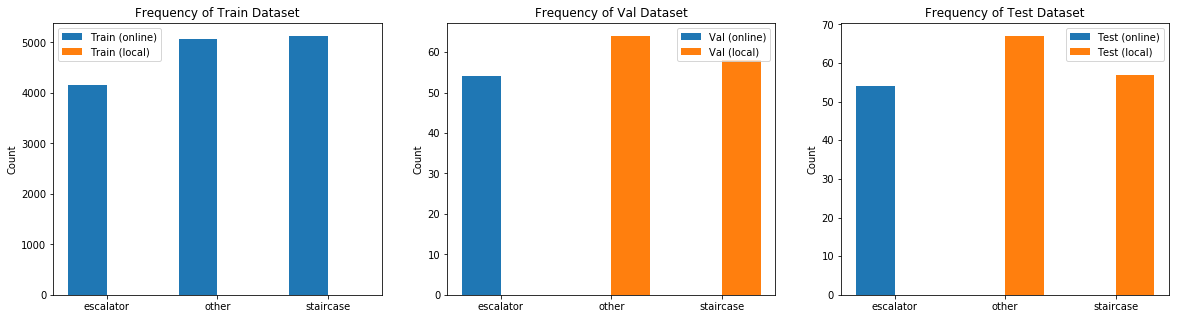

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

labels, train_online_counts = np.unique(y_train_online, return_counts=True)
_, val_online_counts = np.unique(y_val_online, return_counts=True)
_, test_online_counts = np.unique(y_test_online, return_counts=True)

_, train_local_counts = np.unique(y_train_local, return_counts=True)
_, val_local_counts = np.unique(y_val_local, return_counts=True)
_, test_local_counts = np.unique(y_test_local, return_counts=True)

# Handle edge cases
train_local_counts = [0, 0, 0] # no local images

val_online_counts = [val_online_counts[0], 0, 0] # no online staircase and other
val_local_counts = np.insert(val_local_counts,0,0) # no local escalator

test_online_counts = [test_online_counts[0], 0, 0] # no online staircase and other
test_local_counts = np.insert(test_local_counts,0,0) # no local escalator


class_dict = {0: 'escalator', 1: 'other', 2: 'staircase'}
classes = [class_dict[idx] for idx in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)
axs[0].bar(x-width/2, train_online_counts, width, label='Train (online)')
axs[0].bar(x+width/2, train_local_counts, width, label='Train (local)')

axs[1].bar(x-width/2, val_online_counts, width, label='Val (online)')
axs[1].bar(x+width/2, val_local_counts, width, label='Val (local)')

axs[2].bar(x-width/2, test_online_counts, width, label='Test (online)')
axs[2].bar(x+width/2, test_local_counts, width, label='Test (local)')

axs[0].set_ylabel('Count')
axs[0].set_title('Frequency of Train Dataset')
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes)
axs[0].legend(loc='upper left')

axs[1].set_ylabel('Count')
axs[1].set_title('Frequency of Val Dataset')
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes)
axs[1].legend(loc='upper right')

axs[2].set_ylabel('Count')
axs[2].set_title('Frequency of Test Dataset')
axs[2].set_xticks(x)
axs[2].set_xticklabels(classes)
axs[2].legend(loc='upper right')


## Data pre-processing

In [1]:
import os
import numpy as np

import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets


data_dir = '/media/shan/Data/places365/places3_standard'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

train_data_ori = datasets.ImageFolder(train_dir, transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
]))
train_data = datasets.ImageFolder(train_dir, transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
]))

test_data_ori = datasets.ImageFolder(test_dir, transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
]))
test_data = datasets.ImageFolder(test_dir, transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
]))


train_loader_ori = torch.utils.data.DataLoader(
        train_data_ori,
        batch_size=256, shuffle=False,
        num_workers=6, pin_memory=True)

train_loader = torch.utils.data.DataLoader(
        train_data,
        batch_size=256, shuffle=False,
        num_workers=6, pin_memory=True)

test_loader_ori = torch.utils.data.DataLoader(
        test_data_ori,
        batch_size=1, shuffle=False,
        num_workers=1, pin_memory=True)

test_loader = torch.utils.data.DataLoader(
        test_data,
        batch_size=1, shuffle=False,
        num_workers=1, pin_memory=True)


In [2]:
from tqdm import tqdm

original_images = []
processed_images = []
original_labels = []
processed_labels = []

class_dict = {0: 'escalator', 1: 'other', 2: 'staircase'}

print("Loading train original set")
for i, (input, target) in tqdm(enumerate(train_loader_ori)):
    if len(original_images) >= 10:
        break
    if i % 5 == 0:
        original_images.append(input[0].numpy())
        original_labels.append(target[0].numpy())
    
print("Loading train set")
for i, (input, target) in tqdm(enumerate(train_loader)):
    if len(processed_images) >= 10:
        break
    if i % 5 == 0:
        processed_images.append(input[0].numpy())
        processed_labels.append(target[0].numpy())
   
print("Loading test original set")
for i, (input, target) in tqdm(enumerate(test_loader_ori)):
    if len(original_images) >= 20:
        break
    if i % 20 == 0:
        original_images.append(input[0].numpy())
        original_labels.append(target[0].numpy())

print("Loading test set")
for i, (input, target) in tqdm(enumerate(test_loader)):
    if len(processed_images) >= 20:
        break
    if i % 20 == 0:
        processed_images.append(input[0].numpy())
        processed_labels.append(target[0].numpy())
    

Loading train original set


46it [00:09,  4.61it/s]


Loading train set


46it [00:08,  5.73it/s]


Loading test original set


181it [00:03, 56.62it/s]

Loading test set



181it [00:03, 57.89it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


original_image: (3, 256, 256)
processed_image: (3, 224, 224)
original_images length: 20
processed_images length: 20
Train set processing


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


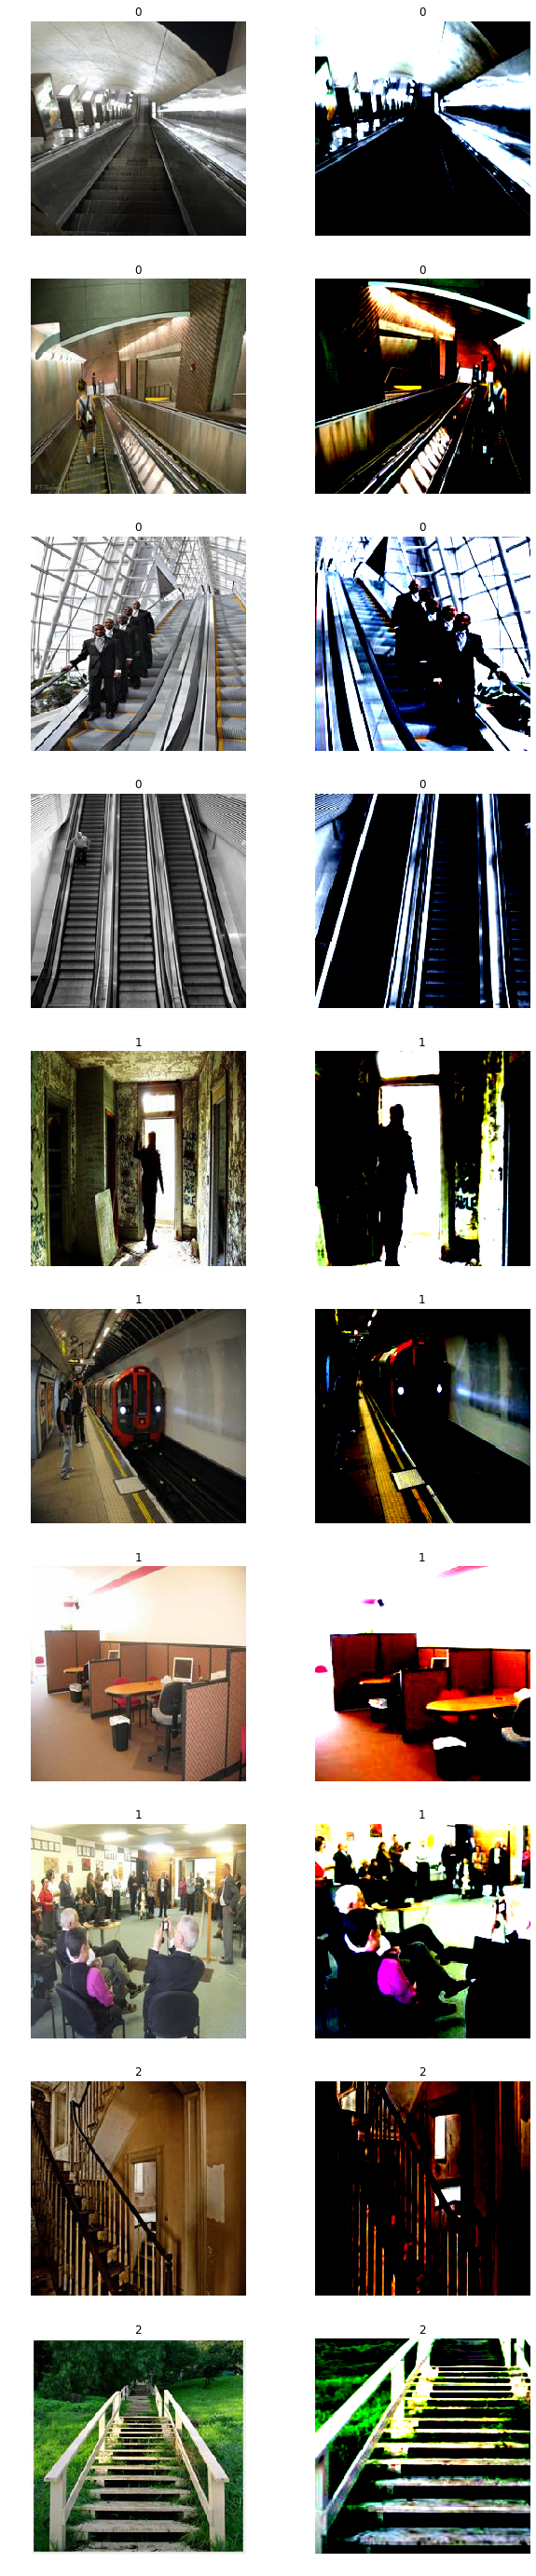

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# original_array = np.asarray(original_images)
# processed_array = np.asarray(processed_images)

# np.concatenate( original_images, axis=0 )
# np.concatenate( processed_images, axis=0 )

print('original_image: {0}'.format(original_images[0].shape))
print('processed_image: {0}'.format(processed_images[0].shape))
print('original_images length: {0}'.format(len(original_images)))
print('processed_images length: {0}'.format(len(processed_images)))

print("Train set processing")
size = len(original_images)
img, vaxis = plt.subplots(10, 2, figsize=(10,50))
vaxis = vaxis.ravel()
for i in range(10):
    image = original_images[i].squeeze()
    image = np.transpose(image, (1, 2, 0))
    label = original_labels[i]
    vaxis[2*i].imshow(image)
    vaxis[2*i].axis('off')
    vaxis[2*i].set_title(label)
    
    image = processed_images[i].squeeze()
    image = np.transpose(image, (1, 2, 0))
    vaxis[2*i+1].imshow(image)
    vaxis[2*i+1].axis('off')
    vaxis[2*i+1].set_title(label)
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Val and test set processing


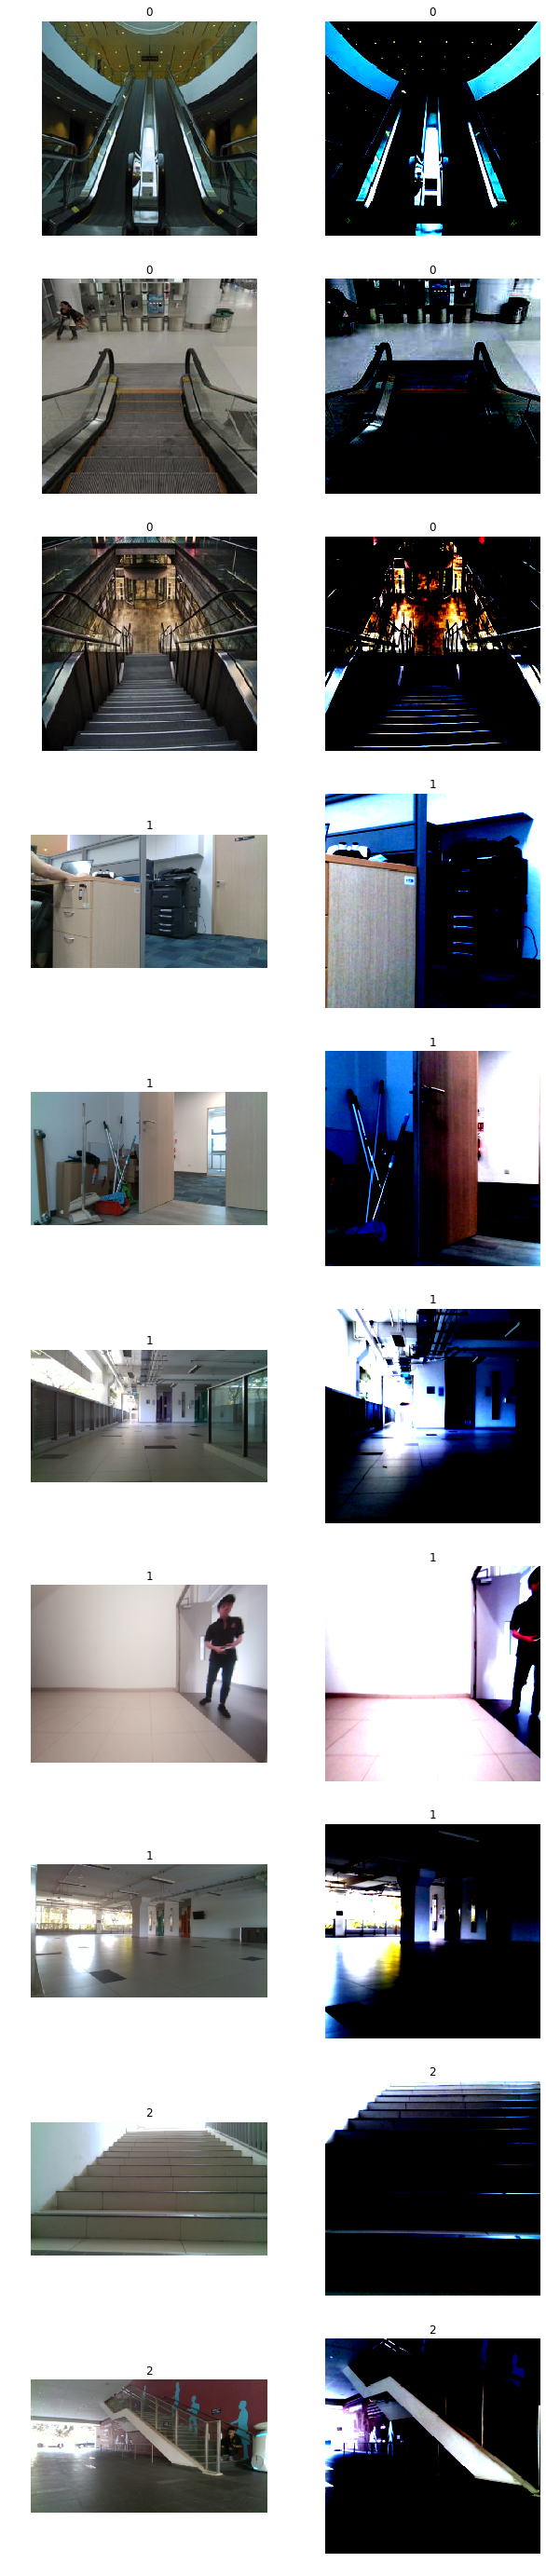

In [8]:
print("Val and test set processing")
size = len(original_images)
img, vaxis = plt.subplots(10, 2, figsize=(10,50))
vaxis = vaxis.ravel()
for i in range(10):
    image = original_images[10+i].squeeze()
    image = np.transpose(image, (1, 2, 0))
    label = original_labels[10+i]
    vaxis[2*i].imshow(image)
    vaxis[2*i].axis('off')
    vaxis[2*i].set_title(label)
    
    image = processed_images[10+i].squeeze()
    image = np.transpose(image, (1, 2, 0))
    label = processed_labels[10+i]
    vaxis[2*i+1].imshow(image)
    vaxis[2*i+1].axis('off')
    vaxis[2*i+1].set_title(label)